In [2]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
import math
import random

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

<h1>Estimate a population</h1>

We can keep estimating populations with our analytical distribution. First - we'll do another normal one, but we'll grab some extra data to investigate it a bit more. 

In [3]:
#Simulate Normal - from last time
#
#Add a return to send back the means and the predictions. 
#
def simulateNormal(mu=0, sigma=1, n=100, m=10000, ciLow=5, ciHi=95):
    means = [] #List of all the means that are created. 
    preds = []
    for j in range(m): #Run m number of simulations. 
        xs = np.random.normal(mu, sigma, n) #Generate a normal dist based on emperical data. 
        xbar = np.mean(xs) #Take the mean of the dist above's values
        means.append(xbar) #Add to list. 
        preds.append(xs)
    cdf = thinkstats2.Cdf(means) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    muList = [mu] * m
    stderr = mean_squared_error(means, muList, squared=False) #RMSE of how different the random analytical means are from the emp. mean. 
    return cdf, ci, stderr, means, preds

In [19]:
means

[0.15938772133998225,
 -0.09291634204372759,
 -0.0705699482199448,
 0.03448621097370099,
 -0.07212744991197093,
 0.07363131433624676,
 -0.13699163474777878,
 0.02742912956082469,
 0.013186591914611426,
 0.055803072605437605,
 0.05894178311034972,
 0.12981817395690265,
 0.012624297128276063,
 0.1753547225287776,
 -0.03615495147328776,
 -0.009691349120960646,
 0.09518336042479411,
 0.2373533258830805,
 -0.0068205526366853595,
 -0.12010499765746971,
 0.1353451682885124,
 -0.15261845508387484,
 0.06465327783328421,
 -0.0399184631011245,
 -0.03537203247506519,
 0.08211515193902702,
 0.015503007312011131,
 -0.14826451593630863,
 0.10387969827985305,
 -0.02224697973501361,
 -0.004179996374937042,
 -0.02239438434531103,
 0.03639445916134977,
 0.048309148719308796,
 0.09930284455697928,
 0.15693785135229904,
 0.37676375137837426,
 0.08707641941357651,
 -0.01408360700438212,
 0.02174874631303436,
 0.09111493193548437,
 -0.03822807722455407,
 0.006974181320498487,
 -0.10256654679003871,
 0.089011

In [18]:
cdf, ci, stderr, means, preds = simulateNormal(m=100)
preds

[array([ 0.62119065,  0.2898278 , -0.81918996, -1.28791165,  0.72174265,
         2.07236892,  0.42451884,  1.57560017, -1.67505002, -0.15733722,
        -1.38048348, -0.32364233,  0.89225835, -0.05321497,  0.52292327,
        -0.3983548 , -1.18025329, -0.61596913,  0.26665879, -0.19561079,
        -0.58304816, -0.21934887,  1.9046552 ,  0.86794134, -1.39265607,
         1.19366239,  0.01896699, -1.37128521,  0.10087721,  1.08852506,
         1.11200704,  0.86260588,  0.31390561, -1.38863986,  0.43467413,
         1.11232333, -0.50290555,  0.17611575, -0.32820457, -0.87258967,
         0.23711673,  0.51642791,  1.18138932,  0.21676767,  0.01885722,
        -0.43304605,  0.33213497, -0.22249857, -0.49750349, -0.67985482,
         1.4932993 , -1.15682454,  0.47476359,  0.19315904, -0.07451458,
        -0.27852219,  0.77707534, -0.09657435,  0.86571648,  0.17977764,
         2.13679629,  1.32677066,  1.94260543,  1.4180916 , -1.57228607,
        -0.67454337, -1.21243328,  0.23862285,  0.4

We'll add these error calculators, we'll use them later. 

In [4]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [5]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [6]:
#Load some data
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<h2>Warmup - Estimate Normal Distribution for Income</h2>

We are given the log.annual.inc, which is the income of the applicants, run through a log transformation. Take a look via a graph...

<AxesSubplot:xlabel='log.annual.inc', ylabel='Count'>

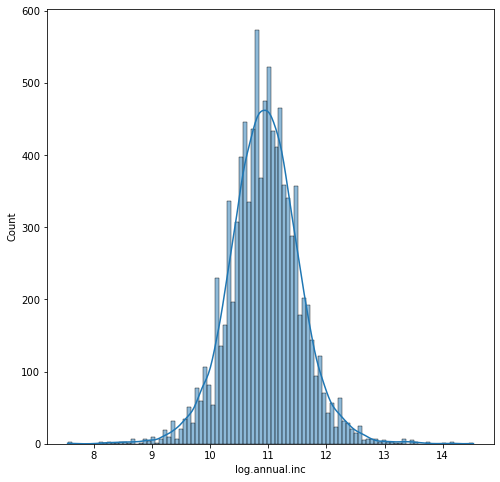

In [8]:
#Graph distribution of log income
sns.histplot(df["log.annual.inc"], kde=True)

<h2>When lognormal is normal!</h2>

The log.annual.inc value looks really normal - estimate the income of the population as a whole. 

Note - this data is the income data, that has been transformed, with a log transformation. This is one example of some ways that we can use a transformation to make analysis easier. Transform the data into somehting that is easy to analyze, like a normal dist, do what you need to do, then transform in reverse to get raw data. 

The original distribution above could be analyzed directly via modelling it with a lognorm distribution, like we'll try below, but normal things are generally more simple, that's why this data was pretransformed. 

Work with the data (already logged):

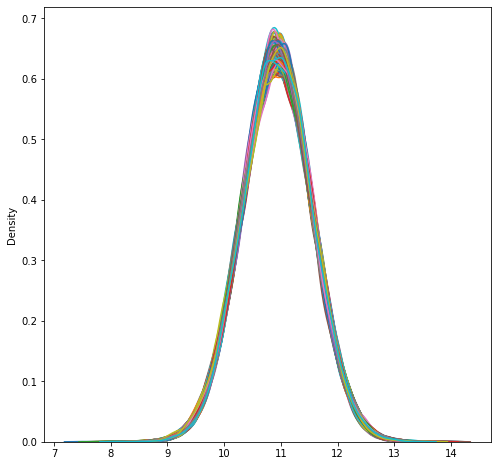

In [9]:
#Generate estimators for normal data. 
mu = df["log.annual.inc"].mean()
sig = df["log.annual.inc"].std()
n = df["log.annual.inc"].count()

#Run Estimations. 
cdf, ci, stderr, means, preds = simulateNormal(mu=mu, sigma=sig, n=n, m=1000, ciLow=5, ciHi=95)

#Graph each of those predictions from above - 1000 originally. 
for i in range(len(preds)):
    sns.kdeplot(preds[i])

Each random band up there is one prediction of the distribution of the population of income. I.E. each one is one execution of the "random" command that generates N variables according to the distribution. 

The means is taking the average of all of those above predicted distributions, then averaging them together. So that is estimating the mean of the population of income M times, graphed below.  

<AxesSubplot:ylabel='Count'>

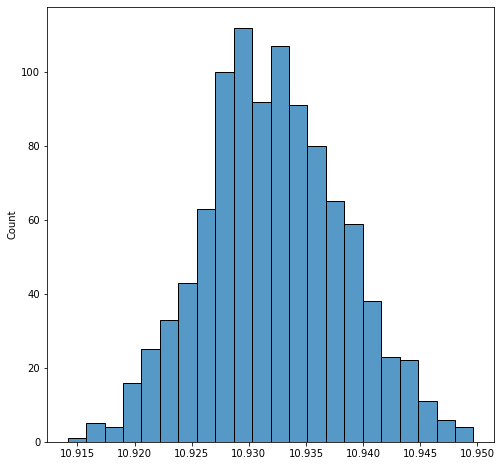

In [10]:
#Plot the means of the above distributions
#sns.kdeplot(means, linestyle="dotted")
sns.histplot(means)

In [11]:
#Is the estimator biased? - Check to see that the mean of the predictions is close to the emperical mean. 
m=10000
estimates = []
for i in range(m):
    L = np.random.normal(mu, sig, n)
    estimates.append(L)
print('Experiment:')
print('rmse L', RMSE(estimates, mu))
print('mean error L', MeanError(estimates, mu))

Experiment:
rmse L 0.6149012024339411
mean error L 7.566582371301228e-05


<b>Estimator does not look biased, the mean error appears to trend near 0</b><br><br><br>
Above is the distribution of the means of the predictions above. So each of those lines up there is a value that's being counted up to make this histogram.


We currently have a log transformed set of data. What if we want to see the real values along with our estimate. 

Estimated Population Mean: 55946.70451509778


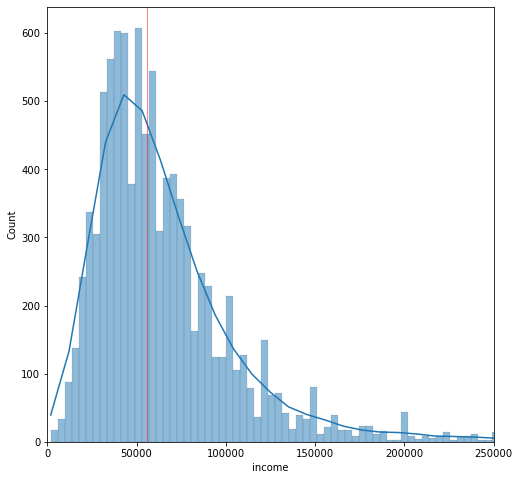

In [16]:
#Visualize as original data. Limit graph to $250k to make it look OK
df["income"] = np.exp(df["log.annual.inc"])
#sns.kdeplot(df["income"], clip=(0,250000))
sns.histplot(df["income"], kde=True)
plt.xlim(0,250000)

convMed = np.exp(np.mean(means))
thinkplot.axvline(convMed, color="red")
print("Estimated Population Mean:", convMed)

<br><br><br>
<h2>More in depth - log normal and fitting</h2>
We can mix things up in a couple of ways to make our estimations more practical and applicable:
<ul>
<li>Use different distributions.
<li>use fitting to to extract the parameters - mean/sigma are simple. This isn't always true.
</ul>

<b>See the below example - same process, but we utilize the FIT function to save us from generating the statistics. 
<br><br>
<b>Think - what could be the drawback to doing this vs. calculating the stats????

In [ ]:
def simulateLogNormal(data, mu=0, n=100, m=10000, ciLow=5, ciHi=95):
    shape, loc, scale = ss.lognorm.fit(data)
    print(shape, loc, scale)
    means = [] #List of all the means that are created. 
    preds = []
    for j in range(m): #Run m number of simulations. 
        xs = ss.lognorm.rvs(s=shape, loc=loc, scale=scale, size=n)
        xbar = np.mean(xs) #Take the mean of the dist above's values
        means.append(xbar) #Add to list. 
        preds.append(xs)
    cdf = thinkstats2.Cdf(means) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    muList = [mu] * m
    means = np.array(means, dtype="float64")
    stderr = mean_squared_error(means, muList, squared=False) #RMSE of how different the random analytical means are from the emp. mean. 
    return cdf, ci, stderr, means, preds

In [ ]:
#simulateLogNormal
cdf, ci, stderr, means, preds = simulateLogNormal(data=df["fico"], mu=df["fico"].mean(), n=df["fico"].count(), m=1000, ciLow=5, ciHi=95)
print(means.mean())
print(stderr)
sns.kdeplot(means)

In [ ]:
print("Standard Error:", stderr)
print("Low CI:", ci[0])
print("Hi CI:", ci[1])
thinkplot.Cdf(cdf)
thinkplot.axvline(ci[0], color="red")
thinkplot.axvline(ci[1], color="red")
thinkplot.Config()

In [ ]:
sns.histplot(df["fico"])

<h2>Why not always fit???</h2>


We are generalizing from a (potentially small) sample. If our sample is really large and/or really representitive of the real population, then fitting is going to be just fine. However, what if our sample has some bias in it? Look at the peaks in the fico distribution - is it more likely the real population has those 'bumps' or that those are a result of randomness in the sample. 
<br>
By not doing the fitting we avoid excessively customizing our estimate to our data - an idea we'll see later when we talk about overfitting. 

<H1>Goals in a game</h1>

Goals in a game (hockey, soccer, whatever) can generally be modelled with a POISSON distribution. 
<br><br>
Below is an example with a team that scores 3 goals per game, and one that scores 7. 

In [ ]:
dist = ss.poisson(3)
dist2 = ss.poisson(7)

sns.histplot(dist.rvs(1000), binwidth=1, stat="density", color="red")
sns.histplot(dist2.rvs(1000), binwidth=1, stat="density")

<h2>Load some data</h2>

We can load some data on hockey!

In [ ]:
#Load and preview data
hock = pd.read_excel("sportsref_download.xlsx", sheet_name="Worksheet", engine="openpyxl", header=1)
hock.head()

In [ ]:
#Rename column for teams
hock = hock.rename(columns={'Unnamed: 1':"Team"})

In [ ]:
#Find the GOALS PER GAME column - It will be very close to GF/G, but we need to be sure!!
hock.columns

In [ ]:
#Get Goals per game for the teams playing.
Oil = hock[hock["Team"]=="Edmonton Oilers"]
gfOil = Oil["GF/G"]
print(gfOil)
Fla = hock[hock["Team"]=="Calgary Flames"]
gfFla = Fla["GF/G"]
print(gfFla)

Simulate one game - take the goals per game, and generate one prediction of an outcome in terms of goals. 

In [ ]:
def SimGame(lam):
    dist = ss.poisson(lam)
    score = dist.rvs(1)
    return score[0]

Simulate a bunch of games, and check for bias in our estimator. 

In [ ]:
def estimateGame(lam=2., m=1000):

    estimates = []
    for i in range(m):
        L = SimGame(lam)
        estimates.append(L)

    print('Goal Distribution:')
    print('rmse Goals:', RMSE(estimates, lam))
    print('mean error Goals:', MeanError(estimates, lam))
    
    pmf = thinkstats2.Pmf(estimates)
    thinkplot.Hist(pmf)
    thinkplot.Config(xlabel='Goals scored', ylabel='PMF')

In [ ]:
estimateGame(gfOil)

In [ ]:
def estimateMatch(team1=1, team2=1, m=1000):
    team1Wins = []
    for i in range(m):
        goal1 = SimGame(team1)
        goal2 = SimGame(team2)
        team1Wins.append(int(goal1>goal2))
    return team1Wins

In [ ]:
np.mean(estimateMatch(gfOil,gfFla,1000))

<h1>Polling!</h1>

Suppose we are trying to estimate who would win the previous presidental election in the US - in Arizona. 

Estimating the overall win would require projecting each state individually (and dealing with Nebraska and Maine), then projecting the total electoral college votes. Same deal, more complex model. Canada is way more complex, since you'd need to project each house seat individually in 4ish way race, then project the distribution of seats, etc... same idea, way more complex scenario.

<ul>
<li>
</ul>

<h2>First - Establish probability an individual vote goes for Biden or Trump. </h2>

From 538: https://projects.fivethirtyeight.com/polls/president-general/arizona/ we can estimate basssed on all the previous polls that a person is approximately 49% likely to vote Biden, and 46% likely to vote Trump. 

Note: What 538 does to get these numbers involves some estimation already. They take multiple polls and attempt to combine them to make as accurate an estimate as possible. They try to correct for polling companies that historically skew Dem, or skew Rep, or tend to be more/less accurate. We could do this with one poll, it would be the same. 

Because we know (from experience) that only one of these two will actually win, we can try to isolate the share of votes of people who vote for one of these two - 3rd part votes are irrelevant. In reality, one of the things that pollsters will do is try to estimate the number of people who poll that they will vote 3rd party, then end up voting for Trump/Biden. This is an estimate they make based on past data, and domain knowledge. E.g. if we estimated that the share of 3rd party poll responses that voted T/B was skewed 2:1 towards Trump (e.g. libritarians voting Republican), we would add an adjustment here based on that knowledge. Maybe we'd add 1% to Biden's vote probability, and 2% to Trump's. This is something that really is an assumption though. These adjustments based on assumed human actions is what makes a really skilled pollster more accurate - they all know how to do the math. 

We can also phrase this in a Bayes table - the prior is the orignal poll values, we get the info that only 95% of voters will vote for one of those two, that updates our knowledge. The calc is pretty simple though, we don't need that...

In [ ]:
#How likely is it for someone to vote Trump and Biden?
probT = .46/(.49+.46)
print("Trump Prob:", probT)

probB = .49/(.49+.46)
print("Biden Prob:", probB)

So, of the votes that will matter, about 51.5% go Biden, 48.5% go Trump. How does this translate to a person making a vote. For each person, we can make a function to basically get one response. 

This person will return one vote. It will be either a vote for Trump or for Biden. That decision will be random, but it will be set with a likelihood that we calculated before - apx 51.5% of the total voters will vote Biden, as the number of votes we collect gets large. 

Note: for the example, we'll use a vote for Biden to be True/1. A vote for Trump is False/0. This is arbitrary. 

Below we have a function to generate a prediciton using a BINOMIAL distribution - it is either 1 or 0. (A 1 sample binomial dist is also called a Bernouli)

In [ ]:
#Generate one vote, with a likelihood supplied as an argument. 
def oneVote(probCalc):
    vote = np.random.binomial(n=1, p=probCalc)
    return vote

In [ ]:
#Get one vote, is it Biden or not?
#Run the cell a bunch of times to repeat. 
oneVote(probB)

OK, now we have our fake voter. One vote isn't good enough, we need to sample a bunch of people. 

Below, generate a list of n predicted voters. Then check the number that voted Biden. 

In [ ]:
#Get an arbitrary number of simulated votes
def getSample(voteProb, n=1000):
    vote_list = []
    for i in range(n):
        vote_list.append(oneVote(voteProb))
    return vote_list

In [ ]:
#Get a bunch of votes, print the percentage that are Biden. 
#Try changing n and see what happens. 
tmp = getSample(probB, 500000)
np.mean(tmp)

That allows us to make one simulation. Congrats - that thing above is one simulated election
<br><br>

We should take a bunch though, and average their results together. 

In [ ]:
def getSamples(voteProb, n=1000, samples=100, ciLow=2.5, ciHi=97.5):
    meanList = []
    for i in range(samples):
        meanList.append(np.mean(getSample(voteProb, n)))
    muList = [voteProb] * samples
    cdf = thinkstats2.Cdf(meanList) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    stderr = mean_squared_error(meanList, muList, squared=False)
    return meanList, stderr, cdf, ci

In [ ]:
getSamples(probB, 1000, 5)

In [ ]:
#Print a grid of differnet n values

countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH, err, cdf, ci = getSamples(probB, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH)
    print("Error:", err)
thinkplot.Config()

In [ ]:
#And the CDFs
for i in range(countHist):
    tmpH, err, cdf, ci = getSamples(probB, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf)
    print("Error:", err)
thinkplot.Config()

Above are multiple executions, with multiple n values. What we should see is that as we get larger and larger n values - the number of 'surveys' taken, we should get closer and closer to a normal curve centered around the expected percentage of votes for Biden = 51.5%. 

<h2>Predict the Winner!!!!</h2>
Now we can calculate our projections!

We don't really want to know what percentage of votes Biden is going to get, we want to know how likely he is to win. 

<br><br><br>
What we can do below is run some simulations, and for each one see if Biden wins, or if he looses, and then count them up. 

In [ ]:
#Run a bunch of trials and count how many Biden wins in. 
trials = 1000
means, err, cdfFin, ciFin = getSamples(probB, n=700, samples=trials)
lowest = means - err
highest = means + err
bWins = 0 
for i in range(len(means)):
    if means[i] > .5000:
        bWins = bWins + 1
print(bWins/trials)

sns.kdeplot(means)
sns.kdeplot(lowest)
sns.kdeplot(highest)
thinkplot.axvline(.5, color="red")

In [ ]:
thinkplot.Cdf(cdfFin)
thinkplot.axvline(ciFin[0], color="red")
thinkplot.axvline(ciFin[1], color="red")